In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sy
import pandas as pd
import sympy as sp

### Punto 1

In [ ]:
#@title Definimos los datos a utilizar
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])
L = 0.98
R = 0.142

In [ ]:
#@title 1. Construir el DataFrame
dicc = {"tiempo": t, "corriente": i}
df = pd.DataFrame(dicc)
df

,tiempo,corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [ ]:
#@title 2. Vamos a calcular la derivada numérica

def derivadas(i, t):
  deltai = np.diff(i)
  deltat = np.diff(t)
  pendientes = deltai/deltat
  return pendientes

derivadas(i, t)

array([2., 2., 4., 6.])

In [ ]:
#@title Definimos una función que calcula el promedio
def promedio(x):
  return (x[1:]+x[0:-1])/2

In [ ]:
#@title Calculamos la fem con los valores obtenidos y lo creamos otro DataFrame
promt = promedio(t)
promi = promedio(i)
fem = L * derivadas(i, t) + R * promi
df2 = pd.DataFrame({"Prom_corriente": promi, "Prom_tiempo": promt, "Fem": fem})
df2

,Prom_corriente,Prom_tiempo,Fem
0,3.11,1.005,2.40162
1,3.13,1.015,2.40446
2,3.16,1.025,4.36872
3,3.21,1.035,6.33582


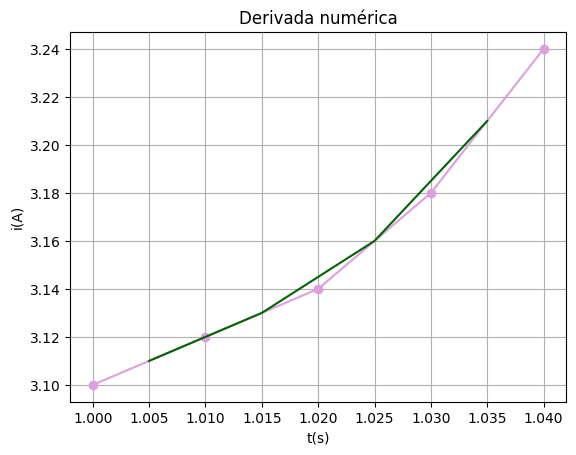

In [ ]:
#@title Gráfica
plt.plot(df["tiempo"], df["corriente"], "-o", color = "plum")
plt.plot(df2["Prom_tiempo"], df2["Prom_corriente"], "-", color = "darkgreen")
plt.title("Derivada numérica")
plt.ylabel("i(A)")
plt.xlabel("t(s)")
plt.grid()
plt.show()

In [ ]:
#realizar interpolacion y derivar

### Punto 2

In [ ]:
#@title Definimos  la función por medio de sympy para realizar la integral
e = 1e-4
x = np.linspace(e, np.pi/2, 100, endpoint = False)
y = 1 / np.sqrt(np.tan(x))

In [ ]:
sy.integrate.trapezoid(y, x)

2.821334104609883

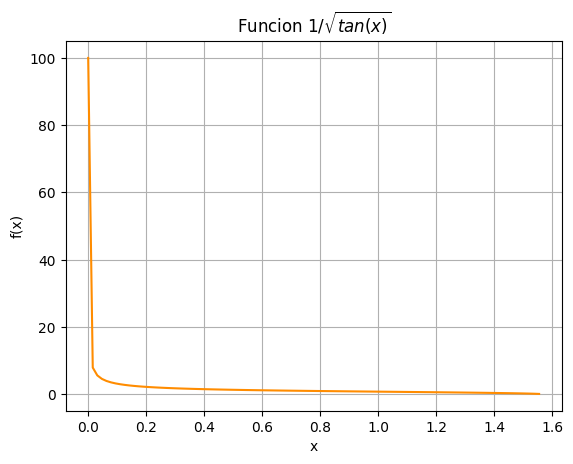

In [ ]:
plt.plot(x, y, color = "darkorange")
plt.title("Funcion $1/\sqrt{tan(x)}$")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.grid()
plt.show()

###Punto 2

In [ ]:
#@title 5. Ejercicio del péndulo

#vamos a definir los valores inciales

m = 0.1 #kg
b = 0.5 #m
g = 9.8 #m/s^2
I_0 = (m*(b**2))/12 #kg*m^2
P_0 = (2*np.pi)*np.sqrt(I_0/(m*g*b)) #s
theta_0 = np.pi/4
k = np.sin(theta_0/2)

In [ ]:
#definimos la función que queremos integrar y el intervalo
f = lambda phi: 1/(1 - ((k**2)*(np.sin(phi)**2)))
phi = np.linspace(0, np.pi/2, 100)

In [ ]:
#@title Y utilizamos dos funciones de scipy para comparar los resultados

I1 = sy.integrate.trapz(f(phi), phi)
I2 = sy.integrate.quad(f, 0, np.pi/2)
print(I1, I2)
P1 = (2*P_0*I1)/np.pi
P2 = (2*P_0*I2[0])/np.pi
print(P1, P2)

1.7002176923707382 (1.7002176923707382, 1.8876208289450448e-14)
0.44345122989563446 0.44345122989563446


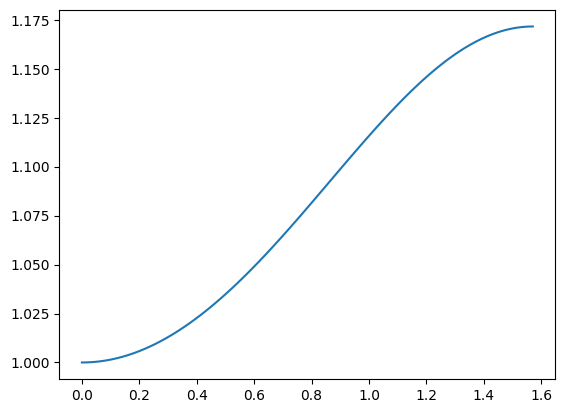

In [ ]:
plt.plot(phi, f(phi))
plt.show()

In [ ]:
#@title vamos a cambiar los valores de $\theta_0$ para realiza una gráfica de $\theta_0$ vs $P$ y generalizar el problema

#definimos un linspace para iterar los valores de theta
tetha_0variable = np.linspace(0, np.pi/2, 100)

#definimos una función phi que reciba los valores de k y de phi
for i in tetha_0variable:
  def funcion_phi(phi):
    y = 1/(1 - ((i**2)*(np.sin(phi)**2)))
    return y
  y(phi)
def periodo_integral(a):
  for i in a:
    integral = sy.integrate.trapz(a(i), phi)
    print(integral)

periodo_integral(a)

#carita triste


TypeError: ignored

## Punto de la integral doble


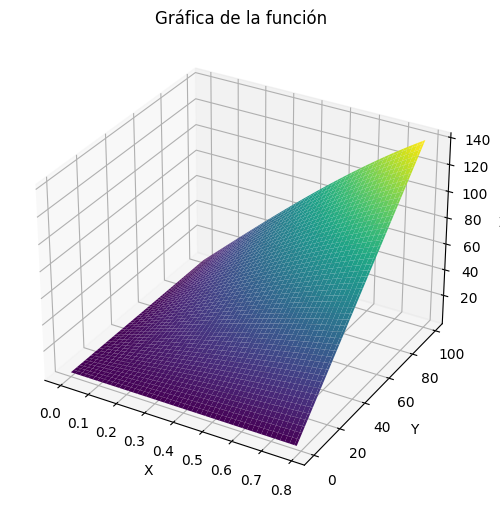

In [37]:
funciondoble = lambda x, y: (2*y*np.sin(x)) + ((np.cos(x))**2)
x = np.linspace(0, np.pi/4, 100)
y = np.linspace(0, 99, 100)
X, Y = np.meshgrid(x, y)
Z = funciondoble(X, Y)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gráfica de la función')

plt.show()

In [56]:

#integrar primero en y y luego en x

x = np.linspace(0, np.pi/4, 100)
def integraldoble(funciondoble, x):
  I = np.zeros(len(x))
  for i,x_ in enumerate(x):
    y = np.linspace(np.sin(x_), np.cos(x_), len(x))
    I[i] = sy.integrate.trapz(funciondoble(x_, y), y)

  return sy.integrate.trapz(I, x)

a = integraldoble(funciondoble, x)
a


0.5118335093392186